In [138]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import log_loss
import math
import matplotlib.pyplot as plt
%matplotlib inline 

In [100]:
data = pd.read_csv('data.csv')
data.head()

,title_words,days_passed,ct_image,ct_tags,ct_words,title_emot_quotient,featured_in_tds,read_time,claps,img/word
0,6.0,1.0,8.0,5.0,2493.0,0.000,True,11.0,683.0,0.003209
1,10.0,1.0,7.0,5.0,2301.0,0.874,True,11.0,696.0,0.003042
2,5.0,2.0,4.0,5.0,547.0,0.000,True,3.0,496.0,0.007313
3,8.0,2.0,2.0,5.0,661.0,0.250,True,3.0,2700.0,0.003026
4,4.0,0.0,5.0,5.0,499.0,0.000,False,3.0,8.0,0.010020


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 10 columns):
title_words            635 non-null float64
days_passed            635 non-null float64
ct_image               635 non-null float64
ct_tags                635 non-null float64
ct_words               635 non-null float64
title_emot_quotient    635 non-null float64
featured_in_tds        635 non-null bool
read_time              635 non-null float64
claps                  635 non-null float64
img/word               635 non-null float64
dtypes: bool(1), float64(9)
memory usage: 45.3 KB


In [102]:
data.max(), data.min()

(title_words               16.000000
 days_passed              835.000000
 ct_image                  35.000000
 ct_tags                    5.000000
 ct_words                6753.000000
 title_emot_quotient        0.874000
 featured_in_tds            1.000000
 read_time                 27.000000
 claps                  22000.000000
 img/word                   0.075342
 dtype: float64, title_words             2.0
 days_passed             0.0
 ct_image                0.0
 ct_tags                 0.0
 ct_words               16.0
 title_emot_quotient     0.0
 featured_in_tds         0.0
 read_time               2.0
 claps                   2.0
 img/word                0.0
 dtype: float64)

In [103]:
data.isnull().sum()

title_words            0
days_passed            0
ct_image               0
ct_tags                0
ct_words               0
title_emot_quotient    0
featured_in_tds        0
read_time              0
claps                  0
img/word               0
dtype: int64

In [104]:
data.claps.min(), data.claps.max()

(2.0, 22000.0)

Bucket by proportion

In [151]:
claps=pd.Series(data['claps'])
n_buckets = 50
buckets, bins = pd.cut(claps, n_buckets, labels=False, retbins=True, precision=4) 
bins = pd.Series(bins).apply(lambda x: format(x, 'f'))
#bins

In [152]:
data['new_claps'] = buckets
#data['new_claps'] = data.claps.rank(method='dense').astype(int)
data.head()

,title_words,days_passed,ct_image,ct_tags,ct_words,title_emot_quotient,featured_in_tds,read_time,claps,img/word,new_claps
0,6.0,1.0,8.0,5.0,2493.0,0.000,True,11.0,683.0,0.003209,1
1,10.0,1.0,7.0,5.0,2301.0,0.874,True,11.0,696.0,0.003042,1
2,5.0,2.0,4.0,5.0,547.0,0.000,True,3.0,496.0,0.007313,1
3,8.0,2.0,2.0,5.0,661.0,0.250,True,3.0,2700.0,0.003026,6
4,4.0,0.0,5.0,5.0,499.0,0.000,False,3.0,8.0,0.010020,0


In [153]:
# bins[data['new_claps']]
# pd.concat([pd.Series(data['claps']), pd.Series(data['new_claps'])
data.new_claps.value_counts()

0     383
1     117
2      62
3      21
4      13
5       9
6       5
9       3
8       3
10      3
13      3
15      3
24      2
35      1
11      1
7       1
14      1
16      1
29      1
33      1
49      1
Name: new_claps, dtype: int64

In [154]:
y = data['new_claps']
X = data.drop(['claps', 'new_claps'], axis = 1)

In [155]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=10)

In [156]:
X_train.shape, X_val.shape

((508, 9), (127, 9))

In [157]:
rf = RandomForestClassifier()

In [158]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [161]:
val_pred = rf.predict_proba(X_val)
#log_loss(y_val, val_pred)
val_pred

array([[ 0.8,  0. ,  0.1, ...,  0. ,  0. ,  0. ],
       [ 0.7,  0.2,  0. , ...,  0. ,  0. ,  0. ],
       [ 0.9,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ..., 
       [ 0.8,  0.2,  0. , ...,  0. ,  0. ,  0. ],
       [ 0.6,  0.2,  0.2, ...,  0. ,  0. ,  0. ],
       [ 0.2,  0.4,  0.1, ...,  0. ,  0. ,  0. ]])

In [163]:
log_loss(y_val, val_pred, labels=rf.classes_)

5.6137477086419567

In [164]:
len(val_pred[0])

20

In [165]:
rf.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 29,
       33, 35, 49])

In [166]:
grid = {'min_samples_leaf' : [3,5], 'max_features' : ['auto', 'log2', 'sqrt']
       }
clf = GridSearchCV(rf, grid, cv=5)
clf.fit(X_train, y_train)
clf.best_estimator_

/Users/neerjadoshi/anaconda2/envs/fastai/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [178]:
rf = RandomForestClassifier(min_samples_leaf=5, max_features='sqrt', n_estimators=50, random_state=10, class_weight='balanced')

rf.fit(X_train, y_train, )
val_pred_probs = rf.predict_proba(X_val)

val_pred = rf.predict(X_val)

In [179]:
log_loss(y_val, val_pred_probs, labels=rf.classes_)

2.4372088804265037

In [180]:
val_pred

array([ 1,  0,  0,  0, 10,  1,  1,  3, 14,  0,  2,  3,  0,  0,  2,  0,  1,
        0, 15,  0,  0,  3,  0,  3,  9, 10, 49, 11,  0,  1,  2, 10, 10,  1,
        4,  1,  0,  1,  3,  1,  0,  3,  2,  1,  0,  3,  0,  1,  1,  0,  0,
        0,  1, 14, 16, 10,  0,  0,  2,  0,  1, 10,  1,  0,  2,  0,  2,  1,
        0, 15,  0, 15,  0,  1,  1,  0,  1,  0, 29,  2,  1,  0,  3,  0,  0,
       11,  1,  0,  0,  1,  0,  3,  1,  0,  0, 11,  2,  0,  0,  2,  0,  0,
        1,  9, 35,  1,  3,  2,  0,  0,  1,  0,  1, 11, 49,  1,  1,  0, 10,
        0,  7,  4,  0,  2,  0,  2,  1])

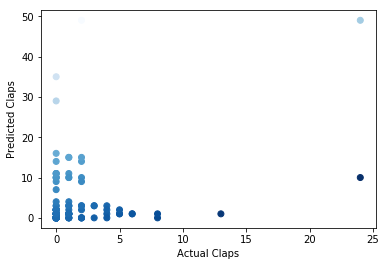

In [181]:
plt.scatter(y_val, val_pred, c=np.subtract(y_val, val_pred), cmap=plt.cm.Blues)
plt.ylabel('Predicted Claps')
plt.xlabel('Actual Claps')
plt.show()

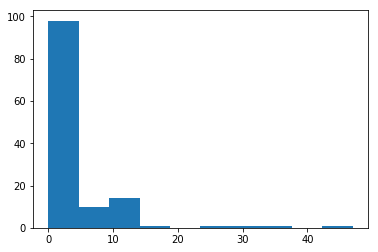

In [182]:
plt.hist(abs(np.subtract(y_val, val_pred)))

plt.show()

In [183]:
np.subtract(y_val, val_pred).value_counts()

 0     48
-1     18
-2     12
 2      5
 1      5
-10     4
-3      3
 3      3
 4      3
-14     3
-11     3
-9      3
 5      2
-7      2
-25     1
 7      1
-8      1
-4      1
 8      1
-16     1
-47     1
-35     1
-12     1
 12     1
-13     1
 14     1
-29     1
Name: new_claps, dtype: int64

In [184]:
fi = pd.DataFrame(rf.feature_importances_, X_train.columns)
fi.sort_values(by = 0, ascending=False)

,0
img/word,0.175181
ct_words,0.173491
days_passed,0.160584
title_words,0.116438
read_time,0.114774
title_emot_quotient,0.112456
ct_image,0.099449
featured_in_tds,0.026477
ct_tags,0.021152
